In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [60]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [61]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [9]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [63]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [64]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [65]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [66]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

In [67]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))


history = model.fit(x_train,
                    steps_per_epoch=500,
                    epochs=2)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

1D Convolutional Model

In [68]:
# Definizione dell'architettura della rete neurale

num_classes = 2
input_channels = 87

model = tf.keras.Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(1, input_channels)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop', loss='mae')

# Training 

# X_train = X_train.reshape(-1, input_length, input_channels)

num_epochs = 20
batch_size = 8
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluation of the model

# X_test = X_test.reshape(-1, input_length, input_channels)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Utilizzo del modello per effettuare predizioni
predictions = model.predict(x_test)


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_16. Consider increasing the input size. Received input shape [None, 1, 87] which would produce output shape with a zero or negative value in a dimension.

1D CN

In [18]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=350,
                    epochs=20)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv1d_10' (type Conv1D).
    
    Negative dimension size caused by subtracting 24 from 1 for '{{node sequential_4/conv1d_10/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_4/conv1d_10/Conv1D/ExpandDims, sequential_4/conv1d_10/Conv1D/ExpandDims_1)' with input shapes: [2,1,1,86], [1,24,86,8].
    
    Call arguments received by layer 'conv1d_10' (type Conv1D):
      • inputs=tf.Tensor(shape=(2, 1, 86), dtype=float32)


GRU

Create training and validation and test data

In [74]:
from sklearn.model_selection import train_test_split

def trainTestData_2 (features, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_1, x_test, y_1, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, test_size=0.2, random_state=42)
    results = pd.DataFrame(columns = perfInd)
    return x_train, x_test, y_train, y_test, x_val, y_val, results

1 layer

Epoch 1/200
31/31 [==============================] - 3s 17ms/step - loss: 0.6440 - accuracy: 0.6078 - val_loss: 0.6635 - val_accuracy: 0.5909
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.6405 - val_loss: 0.6445 - val_accuracy: 0.6515
Epoch 3/200
31/31 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.6863 - val_loss: 0.6259 - val_accuracy: 0.6818
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5672 - accuracy: 0.7255 - val_loss: 0.6074 - val_accuracy: 0.7121
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.7843 - val_loss: 0.5912 - val_accuracy: 0.7424
Epoch 6/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5238 - accuracy: 0.8105 - val_loss: 0.5747 - val_accuracy: 0.7424
Epoch 7/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.8301 - val_loss: 0.5590 - val_accuracy: 0.7424
Epoch 8/200


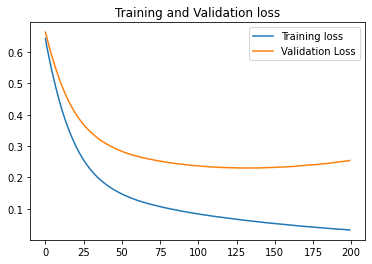

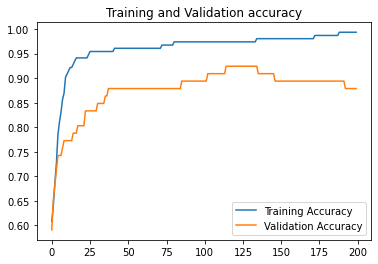

2/2 [==============================] - 0s 6ms/step - loss: 0.1175 - accuracy: 0.9455
Test Loss: 0.11747852712869644
Test Accuracy: 0.9454545378684998


In [110]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [75]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_38 (GRU)                (None, 32)                11520     
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


1 layer (optimizer Adam)

Epoch 1/200
31/31 [==============================] - 3s 17ms/step - loss: 0.7808 - accuracy: 0.3922 - val_loss: 0.7520 - val_accuracy: 0.4545
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.7448 - accuracy: 0.4444 - val_loss: 0.7283 - val_accuracy: 0.5303
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 0.7122 - accuracy: 0.4967 - val_loss: 0.7067 - val_accuracy: 0.5455
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5556 - val_loss: 0.6857 - val_accuracy: 0.6364
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6078 - val_loss: 0.6663 - val_accuracy: 0.6667
Epoch 6/200
31/31 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.6601 - val_loss: 0.6468 - val_accuracy: 0.7273
Epoch 7/200
31/31 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.6993 - val_loss: 0.6303 - val_accuracy: 0.7424
Epoch 8/200


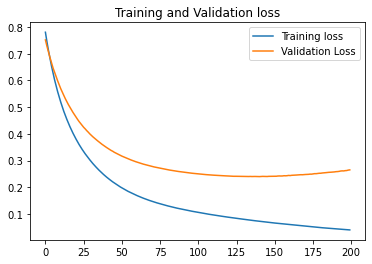

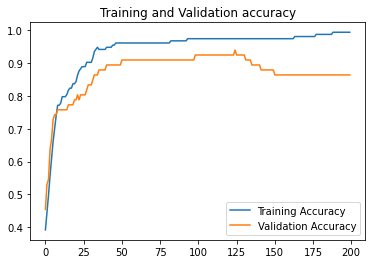

2/2 [==============================] - 0s 5ms/step - loss: 0.0984 - accuracy: 0.9636
Test Loss: 0.09840424358844757
Test Accuracy: 0.9636363387107849


In [111]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1 layer con early stopping

Epoch 1/200
31/31 [==============================] - 2s 15ms/step - loss: 0.7398 - accuracy: 0.4902 - val_loss: 0.7533 - val_accuracy: 0.4394
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5425 - val_loss: 0.7191 - val_accuracy: 0.5000
Epoch 3/200
31/31 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.5817 - val_loss: 0.6885 - val_accuracy: 0.5909
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.6144 - val_loss: 0.6586 - val_accuracy: 0.6364
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.6863 - val_loss: 0.6308 - val_accuracy: 0.6515
Epoch 6/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5437 - accuracy: 0.7843 - val_loss: 0.6042 - val_accuracy: 0.7121
Epoch 7/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5117 - accuracy: 0.8431 - val_loss: 0.5797 - val_accuracy: 0.7727
Epoch 8/200


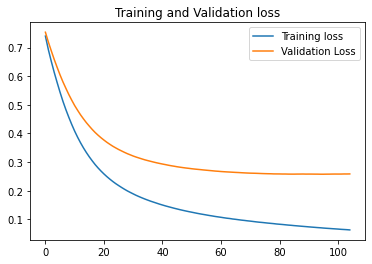

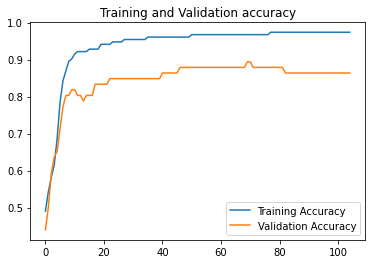

2/2 [==============================] - 0s 5ms/step - loss: 0.0791 - accuracy: 0.9818
Test Loss: 0.07911541312932968
Test Accuracy: 0.9818181991577148


In [112]:
from keras.callbacks import EarlyStopping
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definisci il callback di early stopping
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val), callbacks=[early_stopping])


loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


2 layers 

Epoch 1/200
98/98 [==============================] - 4s 12ms/step - loss: 0.6199 - accuracy: 0.7694 - val_loss: 0.5902 - val_accuracy: 0.7879
Epoch 2/200
98/98 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.8531 - val_loss: 0.5381 - val_accuracy: 0.7879
Epoch 3/200
98/98 [==============================] - 0s 4ms/step - loss: 0.4973 - accuracy: 0.8857 - val_loss: 0.4893 - val_accuracy: 0.8485
Epoch 4/200
98/98 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.9061 - val_loss: 0.4450 - val_accuracy: 0.8636
Epoch 5/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3954 - accuracy: 0.9163 - val_loss: 0.4059 - val_accuracy: 0.8788
Epoch 6/200
98/98 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.9184 - val_loss: 0.3717 - val_accuracy: 0.8939
Epoch 7/200
98/98 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.9224 - val_loss: 0.3419 - val_accuracy: 0.8939
Epoch 8/200


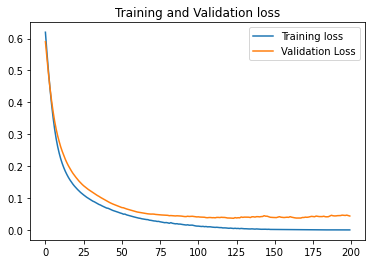

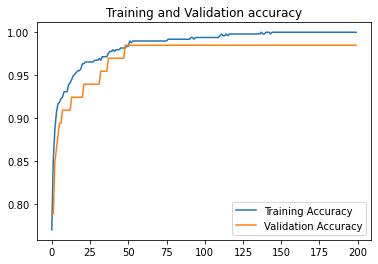

3/3 [==============================] - 0s 4ms/step - loss: 0.7115 - accuracy: 0.8714
Test Loss: 0.7114932537078857
Test Accuracy: 0.8714285492897034


In [137]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]),return_sequences=True))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer = optimizers.Adam(learning_rate=0.001) 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


#model.summary()


1 layer + Dropout

Epoch 1/180
98/98 [==============================] - 4s 14ms/step - loss: 0.7162 - accuracy: 0.5694 - val_loss: 0.7118 - val_accuracy: 0.4848
Epoch 2/180
98/98 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5755 - val_loss: 0.7043 - val_accuracy: 0.5152
Epoch 3/180
98/98 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5796 - val_loss: 0.6971 - val_accuracy: 0.5303
Epoch 4/180
98/98 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5735 - val_loss: 0.6901 - val_accuracy: 0.5606
Epoch 5/180
98/98 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5796 - val_loss: 0.6832 - val_accuracy: 0.5758
Epoch 6/180
98/98 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.6224 - val_loss: 0.6766 - val_accuracy: 0.6212
Epoch 7/180
98/98 [==============================] - 0s 3ms/step - loss: 0.6534 - accuracy: 0.6265 - val_loss: 0.6703 - val_accuracy: 0.6364
Epoch 8/180


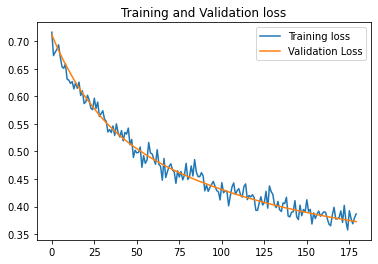

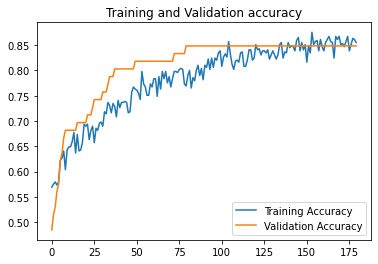

3/3 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.8857
Test Loss: 0.33517444133758545
Test Accuracy: 0.8857142925262451


In [157]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.3,
                     recurrent_dropout=0.3,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer = optimizers.Adam(learning_rate=0.0001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

#Definisco l'ottimizzatore con il learning rate iniziale
initial_learning_rate = 0.0001
optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

# Definisco il learning rate schedule con decay lineare
decay_steps = 1000  # Numero di passi di addestramento dopo i quali applicare il decay
decay_rate = 0.1  # Tasso di decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

# Compilazione del modello
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1 layer con regularization

Epoch 1/200
31/31 [==============================] - 3s 21ms/step - loss: 0.5890 - accuracy: 0.7516 - val_loss: 0.6858 - val_accuracy: 0.5455
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5572 - accuracy: 0.7843 - val_loss: 0.6631 - val_accuracy: 0.6061
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.8105 - val_loss: 0.6420 - val_accuracy: 0.6818
Epoch 4/200
31/31 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.8497 - val_loss: 0.6222 - val_accuracy: 0.7121
Epoch 5/200
31/31 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.8758 - val_loss: 0.6033 - val_accuracy: 0.7121
Epoch 6/200
31/31 [==============================] - 0s 5ms/step - loss: 0.4602 - accuracy: 0.8954 - val_loss: 0.5851 - val_accuracy: 0.7273
Epoch 7/200
31/31 [==============================] - 0s 5ms/step - loss: 0.4393 - accuracy: 0.9020 - val_loss: 0.5685 - val_accuracy: 0.7424
Epoch 8/200


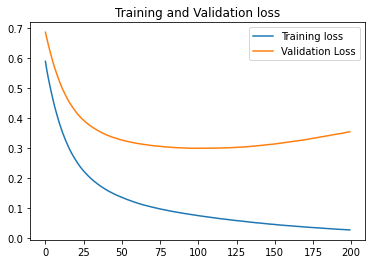

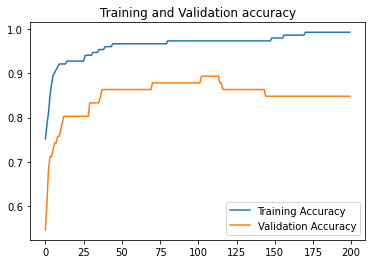

2/2 [==============================] - 0s 5ms/step - loss: 0.0896 - accuracy: 0.9636
Test Loss: 0.08957456797361374
Test Accuracy: 0.9636363387107849


In [109]:
from keras import regularizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]), activity_regularizer=regularizers.l1(0.00001)))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2 layers + Dropout

Epoch 1/200
90/90 [==============================] - 5s 19ms/step - loss: 0.6879 - accuracy: 0.6830 - val_loss: 0.6846 - val_accuracy: 0.6970
Epoch 2/200
90/90 [==============================] - 1s 13ms/step - loss: 0.6791 - accuracy: 0.7321 - val_loss: 0.6760 - val_accuracy: 0.7424
Epoch 3/200
90/90 [==============================] - 1s 13ms/step - loss: 0.6688 - accuracy: 0.7969 - val_loss: 0.6655 - val_accuracy: 0.7576
Epoch 4/200
90/90 [==============================] - 1s 13ms/step - loss: 0.6589 - accuracy: 0.7545 - val_loss: 0.6532 - val_accuracy: 0.7576
Epoch 5/200
90/90 [==============================] - 1s 13ms/step - loss: 0.6460 - accuracy: 0.7902 - val_loss: 0.6385 - val_accuracy: 0.8030
Epoch 6/200
90/90 [==============================] - 1s 13ms/step - loss: 0.6327 - accuracy: 0.8170 - val_loss: 0.6215 - val_accuracy: 0.8182
Epoch 7/200
90/90 [==============================] - 1s 13ms/step - loss: 0.6176 - accuracy: 0.8103 - val_loss: 0.6016 - val_accuracy: 0.8333
Epoch 

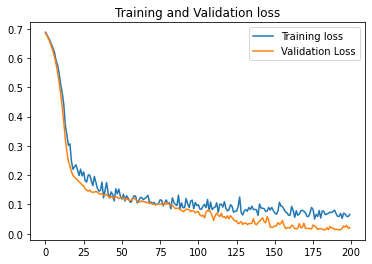

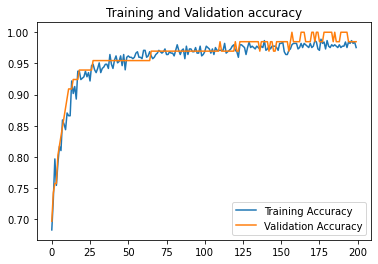

4/4 [==============================] - 0s 6ms/step - loss: 0.0636 - accuracy: 0.9732
Test Loss: 0.06359616667032242
Test Accuracy: 0.9732142686843872


In [135]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.3,
                     recurrent_dropout=0.3,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Implementing GRU with k-fold
Loss: 0.2861, Accuracy: 88.57%
Loss: 0.2583, Accuracy: 92.86%
Loss: 0.3505, Accuracy: 85.71%
Loss: 0.2752, Accuracy: 91.43%
Loss: 0.3514, Accuracy: 87.14%
Loss: 0.2897, Accuracy: 91.43%
Loss: 0.3195, Accuracy: 91.43%
Loss: 0.3837, Accuracy: 88.57%
Average accuracy: 0.8964
Average loss: 0.3143
(200,)


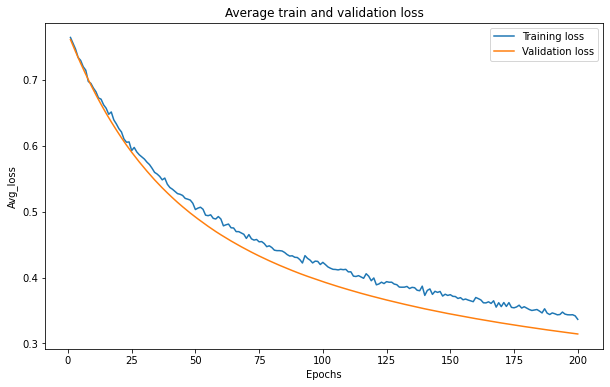

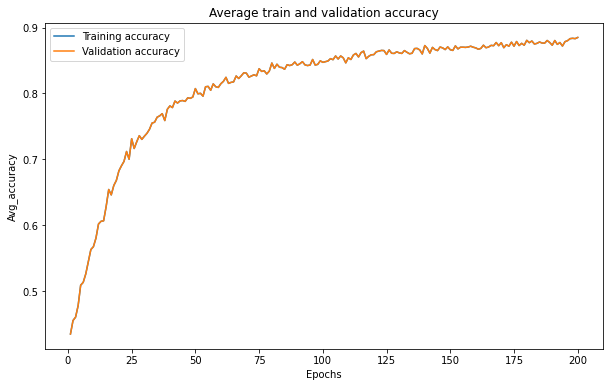

In [136]:
k = 8  # numero di fold
kf = KFold(n_splits=k, shuffle = True)

# Array per memorizzare le curve di apprendimento
val_loss = []
val_acc = []
train_loss = []
train_acc = []

test_acc = []
test_loss = []

f = pd.DataFrame(columns = perfInd)
print('Implementing GRU with k-fold')

for train, test in kf.split(ft):
    x_train = ft.iloc[train,:ft.shape[1]-1]
    x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
    y_train = ft.loc[train,'seizure'].values.astype(int)
    x_test = ft.iloc[test,:ft.shape[1]-1]
    x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
    y_test = ft.loc[test,'seizure'].values.astype(int)

    model = Sequential()
    model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, x_train.shape[-1])))
    model.add(layers.Dense(1, activation='sigmoid'))


    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size = 5, epochs = 200, verbose = 0, validation_data=(x_test,y_test))

    
    train_loss.append(history.history['loss'])
    train_acc.append(history.history['accuracy'])
    val_loss.append(history.history['val_loss'])
    val_acc.append(history.history['val_accuracy'])

    # Valuta il modello
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_acc.append(accuracy)
    test_loss.append(loss)

    # Stampa i risultati di accuracy e loss per la k-esima fold
    print("Loss: {:.4f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))



 # Calculate average performance
avg_accuracy = np.mean(test_acc)
avg_loss = np.mean(test_loss)
print(f'Average accuracy: {avg_accuracy:.4f}')
print(f'Average loss: {avg_loss:.4f}')



avg_train_loss = np.mean(train_loss, axis=0)
avg_train_acc = np.mean(train_acc, axis=0)
avg_val_loss = np.mean(val_loss, axis=0)
avg_val_acc = np.mean(train_acc, axis=0)
print(np.shape(avg_train_loss))

# Plot delle curve di apprendimento mediate sulle K fold

epochs = range(1, len(train_loss[0]) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_loss, label='Training loss')
plt.plot(epochs, avg_val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Avg_loss')
plt.title('Average train and validation loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_acc, label='Training accuracy')
plt.plot(epochs, avg_val_acc, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Avg_accuracy')
plt.title('Average train and validation accuracy')
plt.legend()
plt.show()


k fold crossvalidation 1 layer with dropout

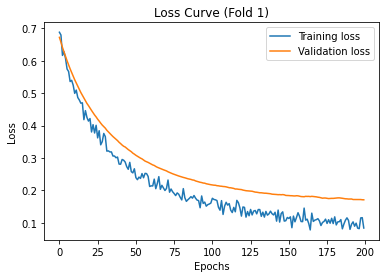

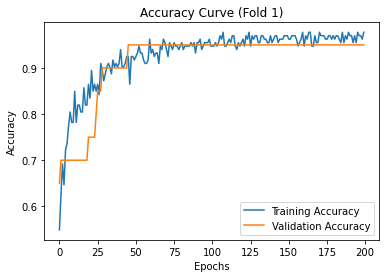

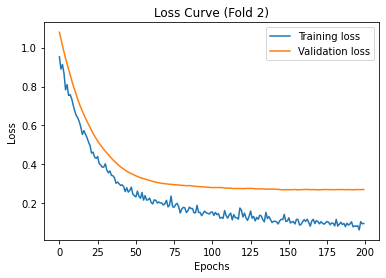

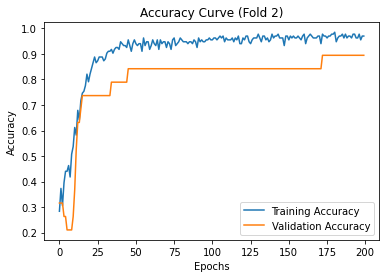

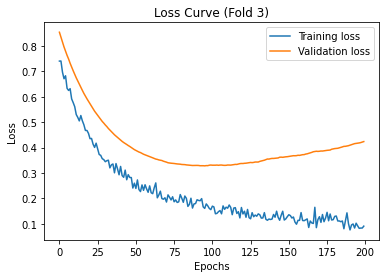

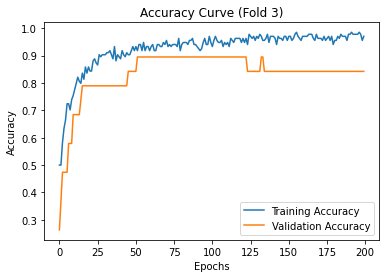

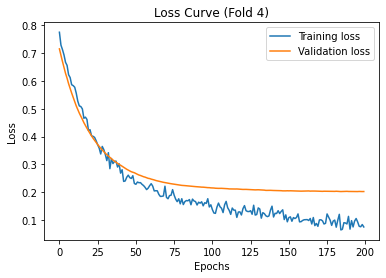

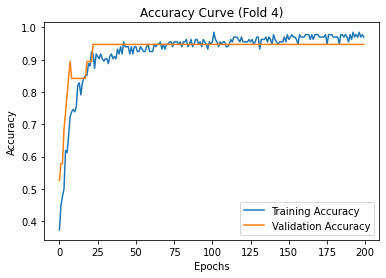

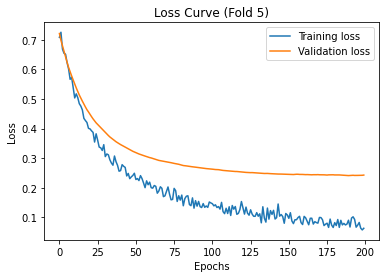

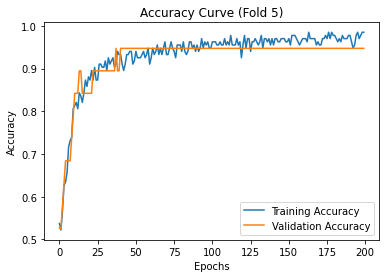

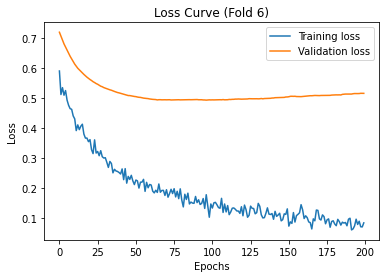

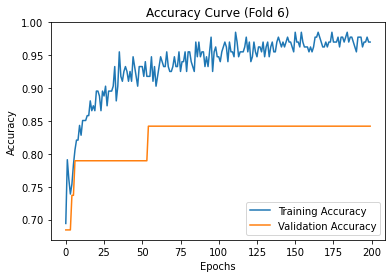

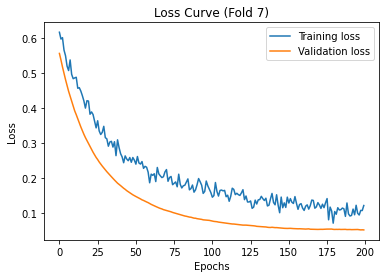

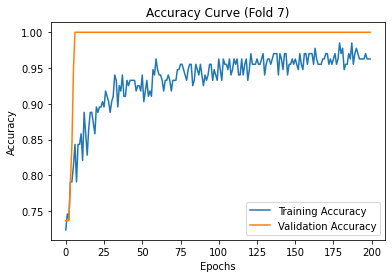

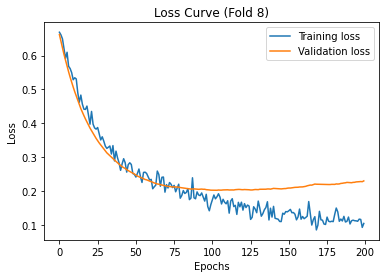

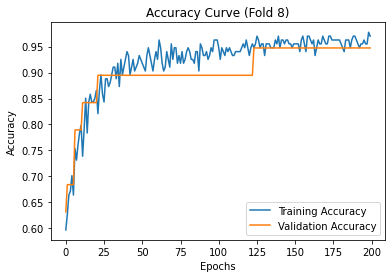

Mean Loss: 0.2633
Mean Accuracy: 0.9214


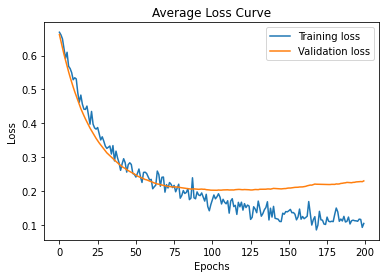

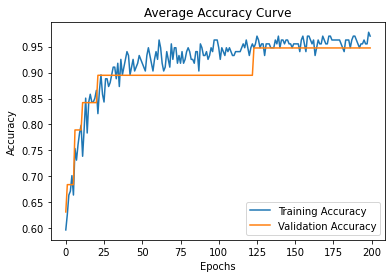

In [124]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define the number of folds (K)
k = 8

# Create lists to store the evaluation metrics for each fold
loss_scores = []
acc_scores = []

# Create an instance of KFold with the desired number of folds
kfold = KFold(n_splits=k, shuffle=True)

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(x_train):
    # Split the data into training set and validation set for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, x_train.shape[-1])))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train_fold, y_train_fold, batch_size=5, epochs=200, verbose=0, validation_data=(x_val_fold, y_val_fold))


    # Evaluate the model on the current validation set
    loss, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Record the evaluation metrics for the current fold
    loss_scores.append(loss)
    acc_scores.append(acc)

    # Plot the loss curve for the current fold
    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss Curve (Fold {})'.format(len(loss_scores)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot the accuracy curve for the current fold
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve (Fold {})'.format(len(acc_scores)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Calculate the mean of the evaluation metrics across folds
mean_loss = np.mean(loss_scores)
mean_acc = np.mean(acc_scores)

# Print the mean evaluation metrics
print("Mean Loss: {:.4f}".format(mean_loss))
print("Mean Accuracy: {:.4f}".format(mean_acc))

# Plot the average loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Average Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the average accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Average Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Mean Loss: 0.2496
Mean Accuracy: 0.9125


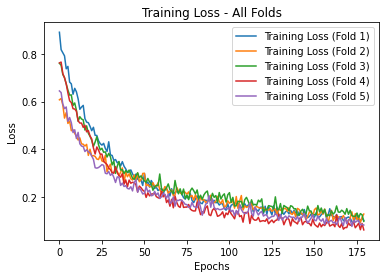

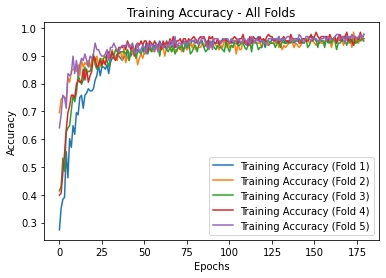

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import RMSprop

# Define the number of folds (K)
k = 5

# Create lists to store the evaluation metrics for each fold
loss_scores = []
acc_scores = []
history_list = []  # Add this line

# Create an instance of KFold with the desired number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(x_train):
    # Split the data into training set and validation set for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, x_train.shape[-1])))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the desired optimizer and loss function
    optimizer = RMSprop(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the current training set
    history = model.fit(x_train_fold, y_train_fold, batch_size=5, epochs=180, verbose=0,
                        validation_data=(x_val_fold, y_val_fold))
    history_list.append(history)

    # Evaluate the model on the current validation set
    loss, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Record the evaluation metrics for the current fold
    loss_scores.append(loss)
    acc_scores.append(acc)

# Calculate the mean of the evaluation metrics across folds
mean_loss = np.mean(loss_scores)
mean_acc = np.mean(acc_scores)

# Print the mean evaluation metrics
print("Mean Loss: {:.4f}".format(mean_loss))
print("Mean Accuracy: {:.4f}".format(mean_acc))

# Plot the average loss curve
plt.figure()
for i in range(len(loss_scores)):
    plt.plot(history_list[i].history['loss'], label='Training Loss (Fold {})'.format(i+1))
plt.title('Training Loss - All Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the average accuracy curve
plt.figure()
for i in range(len(acc_scores)):
    plt.plot(history_list[i].history['accuracy'], label='Training Accuracy (Fold {})'.format(i+1))
plt.title('Training Accuracy - All Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


2 layers + 2 Dropout

In [120]:
from keras import optimizers
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(layers.GRU(64,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dropout(0.3))  # Added dropout layer
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))



# Plotting
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))


plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss with 2 dropout')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy with 2 dropout')
plt.legend()
plt.show()


NameError: name 'RMSprop' is not defined

Early stopping + validation

Epoch 1/100
10/10 [==============================] - 8s 190ms/step - loss: 0.6925 - accuracy: 0.4665 - val_loss: 0.6916 - val_accuracy: 0.6076
Epoch 2/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6890 - accuracy: 0.6518 - val_loss: 0.6866 - val_accuracy: 0.6582
Epoch 3/100
10/10 [==============================] - 0s 45ms/step - loss: 0.6780 - accuracy: 0.7412 - val_loss: 0.6731 - val_accuracy: 0.7595
Epoch 4/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6590 - accuracy: 0.7732 - val_loss: 0.6393 - val_accuracy: 0.8481
Epoch 5/100
10/10 [==============================] - 0s 44ms/step - loss: 0.6117 - accuracy: 0.8147 - val_loss: 0.5548 - val_accuracy: 0.8608
Epoch 6/100
10/10 [==============================] - 0s 51ms/step - loss: 0.4545 - accuracy: 0.9042 - val_loss: 0.3178 - val_accuracy: 0.9114
Epoch 7/100
10/10 [==============================] - 0s 46ms/step - loss: 0.2281 - accuracy: 0.9393 - val_loss: 0.2406 - val_accuracy: 0.9367
Epoch

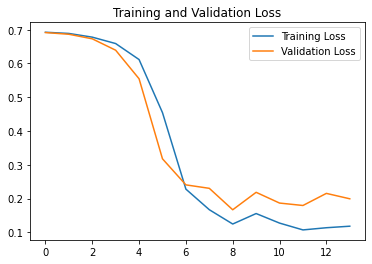

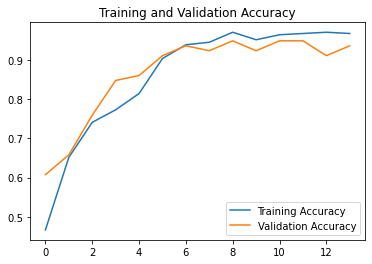

In [ ]:
from keras import optimizers
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import GRU, Reshape, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definizione del modello
model = Sequential()
model.add(GRU(64,
              dropout=0.2,
              recurrent_dropout=0.2,
              input_shape=(None, x_train.shape[-1])))
model.add(Reshape((model.output_shape[1], 1)))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

# Addestramento con early stopping
history4 = model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

# Plot dell'andamento della loss e dell'accuracy
loss = history4.history['loss']
val_loss = history4.history['val_loss']
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



K FOLD

Average Training Loss: 0.10775990085676312
Average Training Accuracy: 0.9839999973773956
Average Validation Loss: 0.21052378043532372
Average Validation Accuracy: 0.9320000112056732


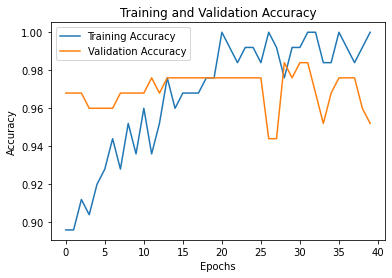

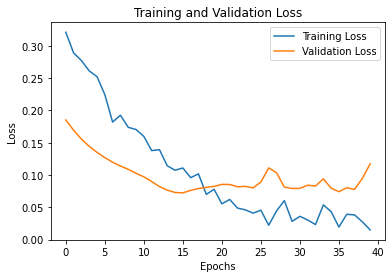

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.15,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 2
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=40, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

kfold + test

Average Training Loss: 0.20781814058621725
Average Training Accuracy: 0.9659476280212402
Average Validation Loss: 0.24783137192328772
Average Validation Accuracy: 0.9560623367627462


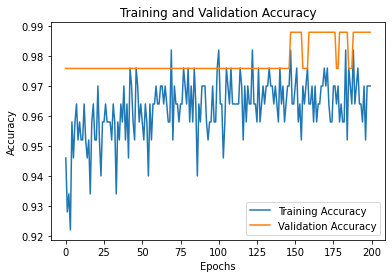

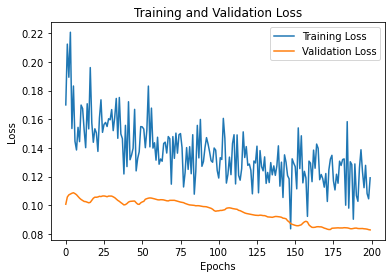

<Figure size 432x288 with 0 Axes>

6/6 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9762
Test Loss: 0.11103323847055435
Test Accuracy: 0.976190447807312


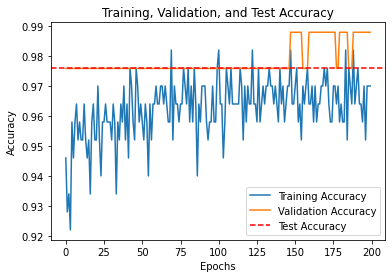

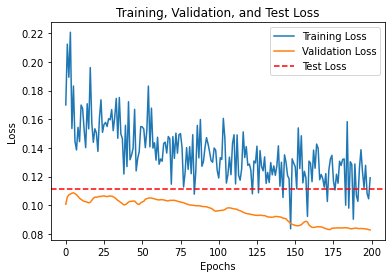

In [ ]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definizione del modello
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.20,
                     recurrent_dropout=0.15,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilazione del modello
optimizer = optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Definizione del k-fold cross-validation
k = 3
  # Numero di fold
kf = KFold(n_splits=k, shuffle=True)

# Liste per salvare le metriche di ogni fold
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Esecuzione del k-fold cross-validation
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Addestramento del modello sul fold corrente
    history = model.fit(x_train_fold, y_train_fold, epochs=200, validation_data=(x_val_fold, y_val_fold), verbose=0)
    
    # Calcolo delle metriche sul fold corrente
    train_loss, train_acc = model.evaluate(x_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    
    # Salvataggio delle metriche
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

# Calcolo delle medie delle metriche dei fold
avg_train_loss = sum(train_losses) / k
avg_train_acc = sum(train_accs) / k
avg_val_loss = sum(val_losses) / k
avg_val_acc = sum(val_accs) / k

# Stampa delle metriche medie
print("Average Training Loss:", avg_train_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Loss:", avg_val_loss)
print("Average Validation Accuracy:", avg_val_acc)

# Primo grafico - Training e Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Secondo grafico - Training e Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.tight_layout()  # Per evitare sovrapposizione di assi e titoli
plt.show()

# Valutazione del modello sui dati di test
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Grafico - Test Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Grafico - Test Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

LSTM 

In [ ]:
lstm_units = 128
dense_units = 32  

CompleteLSTM(x_train, x_test, y_train, y_test, results, ft, kf, perfInd, epochs, batch, lstm_units, dense_units, dropout_percentage, loss_function, metric)